# Codage de Rice

### Les étapes du codage de Rice :

##### Étape 1 :

Choisir un nombre k. Ici, nous testerons le résultat sur plusieurs valeurs de k avant de déterminer la meilleure valeur.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# On choisit un coefficient arbitraire pour l'instant : 
k = 4 

# Valeur à coder : 
value = 18


##### Étape 2 :

On divise le nombre par notre coefficient afin d'obtenir le quotient et le reste.

In [27]:
def division(value, k):
    return value // k, value % k

#On obtient alors :
print("résultat de la division entière : ")
print("quotient : ", division(value, k)[0])
print("reste : ", division(value, k)[1])

résultat de la division entière : 
quotient :  4
reste :  2


##### Etapes 3 : 

Maintenant, on doit coder le quotient en unaire, ajouter 1 et terminer en écrivant en notant la valeur du reste en binaire


In [28]:
quotient, reste = division(value, k)

result = []

#On commence par coder le quotient :

for i in range(0, quotient):
    result.append(1)

#On ajoute un 0 : 

result.append(0)

#On ajoute le reste :

# Donne la valeur binaire du reste sur k bits
res = [0] * k  # Initialise une liste de k zéros

index = k - 1
while reste > 0 and index >= 0:
    res[index] = reste % 2
    reste >>= 1
    index -= 1

result.extend(res)  # Ajoute les bits du reste à la suite du résultat
print(result)

[1, 1, 1, 1, 0, 0, 0, 1, 0]


### Code globale ✨

Voici le code qui permet de réaliser le codage de Rice 


In [62]:
def Rice_encode(value, k):
    quotient, reste = division(value, k)
    result = []

    for i in range(0, quotient):
        result.append(1)
    result.append(0)

    res = [0] * k
    index = k - 1
    while reste > 0 and index >= 0:
        res[index] = reste % 2
        reste >>= 1
        index -= 1

    result.extend(res)
    return result

#Exemple d'utilisation :

value = 25
k = 10

encoded_value = Rice_encode(value, k)
print("valeur codée : ", encoded_value)
print(len(Rice_encode(value, k)))

valeur codée :  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
13


### Petite étude de l'intérêt 📊

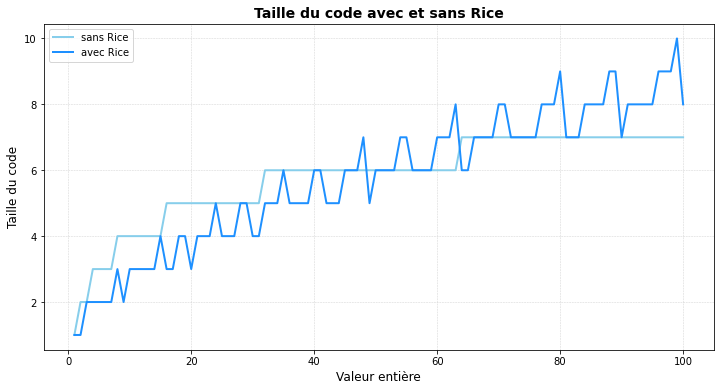

In [75]:
# Les résultats codage sans Rice

entier = np.linspace(1,100, num=100, dtype=int)

sans_rice = []
avec_rice = []

for i in enumerate(entier):
    #Sans Rice
    sans_rice.append(len(list(np.binary_repr(i[1], None))))
    #Avec Rice
    best_idx = 1000 # valeur absurde
    for j in range(1, 30):
        best = len(Rice_encode(i[1], best_idx))
        val = len(Rice_encode(i[1], j))
        if  val < best:
            best_idx = j
    avec_rice.append(best_idx)


plt.figure(figsize=(12, 6))  # Augmenter la taille de l'image
plt.plot(entier, sans_rice, label="sans Rice", color="skyblue", linewidth=2)
plt.plot(entier, avec_rice, label="avec Rice", color="dodgerblue", linewidth=2)
plt.xlabel("Valeur entière", fontsize=12)
plt.ylabel("Taille du code", fontsize=12)
plt.title("Taille du code avec et sans Rice", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
plt.show()


## TODO : ajouter le décodage dans un lien : 



SLIENARD